# Installation: 

In [1]:
!pip install playwright


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!playwright install

In [3]:
from playwright.async_api import async_playwright

In [4]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless=False)
page = await browser.new_page()

# Go to the page:

In [5]:
await page.goto("https://www.pulitzer.org/prize-winners-by-category/210")

<Response url='https://www.pulitzer.org/prize-winners-by-category/210' request=<Request url='https://www.pulitzer.org/prize-winners-by-category/210' method='GET'>>

In [6]:
html = await page.content()
html

'<!DOCTYPE html><html lang="en" ng-app="app" ng-controller="global" class="js ng-scope wf-adobegaramondpro-n7-active wf-adobegaramondpro-n6-active wf-adobegaramondpro-n4-active wf-adobegaramondpro-i4-active wf-acuminpro-n4-active wf-adobegaramondpro-i7-active wf-active"><head><meta http-equiv="origin-trial" content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9"><style type="text/css">@charset "UTF-8";[ng\\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="wi

# Scraping:

In [7]:
from bs4 import BeautifulSoup

# Take the HTML from currently fully loaded page
# notice: THERE'S NO REQUESTS ANYWHERE!!!!
soup_doc = BeautifulSoup(html)

In [8]:
# Access the winners' table
rows = soup_doc.find_all('div', class_='row table-row ng-scope')
    
for row in rows:
    # Extract Year: 
    year = row.find('div', class_='col-sm-4 body table-category ng-scope')
    if year:
        year = year.text.strip()
    else:
        year = "N/A"
        
    # Extract the Winners list: 
    winners = row.find_all('div', class_='col-sm-8 table-winners angular-animate ng-trans ng-trans-fade-down')
    for winner in winners:
        winner_name = winner.text.strip()
        print(f"Year: {year}, Winner: {winner_name}")

Year: 2024, Winner: Staff of The New York Times
For its wide-ranging and revelatory coverage of Hamas’ lethal attack in southern Israel on October 7, Israel’s intelligence failures and the Israeli military’s sweeping, deadly response in Gaza.
Year: 2023, Winner: Staff of The New York Times
For their unflinching coverage of Russia’s invasion of Ukraine, including an eight-month investigation into Ukrainian deaths in the town of Bucha and the Russian unit responsible for the killings.
Year: 2022, Winner: Staff of The New York Times, notably Azmat Khan, contributing writer
For courageous and relentless reporting that exposed the vast civilian toll of U.S.-led airstrikes, challenging official accounts of American military engagements in Iraq, Syria and Afghanistan. (Moved by the Board from the Public Service category, where it was also nominated.)
Year: 2021, Winner: Megha Rajagopalan, Alison Killing and Christo Buschek of BuzzFeed News
For a series of clear and compelling stories that use

In [9]:
winners = []
rows = soup_doc.find_all('div', class_='row table-row ng-scope')
    
for row in rows:
    # Extract the Winners list: 
    winner_elements = row.find_all('div', class_='col-sm-8 table-winners angular-animate ng-trans ng-trans-fade-down')
    for winner in winner_elements:
            winner_name = winner.text.strip()  
            # Get rid of the winner info expansion line
            winner_name = winner_name.split('\n')[0].strip()
            winners.append(winner_name)

winners

['Staff of The New York Times',
 'Staff of The New York Times',
 'Staff of The New York Times, notably Azmat Khan, contributing writer',
 'Megha Rajagopalan, Alison Killing and Christo Buschek of BuzzFeed News',
 'Staff of The New York Times',
 'Maggie Michael, Maad al-Zikry and Nariman El-Mofty of Associated Press',
 'Staff of Reuters, with notable contributions from Wa Lone and Kyaw Soe Oo',
 'Clare Baldwin, Andrew R.C. Marshall and Manuel Mogato of Reuters',
 'The New York Times Staff',
 'Alissa J. Rubin of The New York Times',
 'The New York Times Staff',
 'Jason Szep and Andrew R.C. Marshall of Reuters',
 'David Barboza of The New York Times',
 'Jeffrey Gettleman of The New York Times',
 'Clifford J. Levy and Ellen Barry of The New York Times',
 'Anthony Shadid of The Washington Post',
 'Staff of The New York Times',
 'Steve Fainaru of The Washington Post',
 'Staff of The Wall Street Journal',
 'Joseph Kahn and Jim Yardley of The New York Times',
 'Dele Olojede of Newsday, Long Is

In [10]:
len(winners)

82

In [11]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [12]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
df_winner_annual = pd.read_excel("pulitzer_winners_annual.xlsx")
df_winner_annual

,Year,News Organization,Winner Description
0,2024,The New York Times,For its wide-ranging and revelatory coverage o...
1,2023,The New York Times,For their unflinching coverage of Russia’s inv...
2,2022,The New York Times,For courageous and relentless reporting that e...
3,2021,BuzzFeed News,For a series of clear and compelling stories t...
4,2020,The New York Times,"For a set of enthralling stories, reported at ..."
...,...,...,...
77,1952,Associated Press,For the sustained quality of his coverage of n...
78,1951,Unknown,For their reporting of the Korean War.
79,1950,The Christian Science Monitor,For his series of 43 articles written over a t...
80,1949,The Baltimore Sun,"For his series of 12 articles entitled, ""Exper..."


In [14]:
df_winner_annual['News Organization'].value_counts()

News Organization
The New York Times                            28
The Washington Post                            8
The Wall Street Journal                        5
Associated Press                               4
Newsday                                        4
The Christian Science Monitor                  3
Reuters                                        3
Los Angeles Times                              3
The Baltimore Sun                              2
Chicago Tribune                                2
The Village Voice                              1
Associated Press and The New York Times        1
Unknown                                        1
The Milwaukee Journal                          1
Scripps-Howard Newspapers                      1
International News Service                     1
United Press                                   1
New York Daily News                            1
New York Herald Tribune Syndicate              1
The Miami News                                 1
Ph

In [15]:
df_newsorg_counts = pd.read_excel("news_org_counts.xlsx")
df_newsorg_counts

,News Organization,count
0,The New York Times,30
1,The Washington Post,9
2,The Wall Street Journal,5
3,The Associated Press,6
4,Newsday,4
5,The Christian Science Monitor,3
6,Reuters,3
7,Los Angeles Times,3
8,The Baltimore Sun,2
9,Chicago Tribune,2


In [16]:
df_newsorg_counts = df_newsorg_counts.sort_values(by='count', ascending=False)
df_newsorg_counts

,News Organization,count
0,The New York Times,30
1,The Washington Post,9
3,The Associated Press,6
2,The Wall Street Journal,5
4,Newsday,4
5,The Christian Science Monitor,3
6,Reuters,3
7,Los Angeles Times,3
9,Chicago Tribune,2
8,The Baltimore Sun,2


In [17]:
df_tenyears_major_events = pd.read_excel("Ten Years Major Events Blotter.xlsx")
df_tenyears_major_events

,Year,Pulitzer Prize Winner of International Reporting,Reporting Overview,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 15,Event Time,Related Major Event
0,2024.0,The New York Times,For its wide-ranging and revelatory coverage o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hamas’ lethal attack in southern Israel (2023),NaN,NaN,NaN,October,Hamas’ lethal attack in southern Israel (2023)
1,2023.0,The New York Times,For their unflinching coverage of Russia’s inv...,NaN,Russia’s invasion of Ukraine (2022),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,February,Russia’s invasion of Ukraine (2022)
2,2022.0,The New York Times,For courageous and relentless reporting that e...,""" … a hidden Pentagon archive of the American ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,""" … a hidden Pentagon archive of the American ..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""... After observing a man dragging an “unknow...",NaN,NaN,November,"""... After observing a man dragging an “unknow..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,""" ... American Special Operations forces bombe...",NaN,NaN,NaN,NaN,NaN,NaN,July,""" ... American Special Operations forces bombe..."
5,2021.0,BuzzFeed News,For a series of clear and compelling stories t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""With at least tens of thousands of detainees ...",NaN,NaN,End of 2017,"""With at least tens of thousands of detainees ..."
6,2020.0,The New York Times,"For a set of enthralling stories, reported at ...","""In 2006, Russian President Vladimir V. Putin ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,"""In 2006, Russian President Vladimir V. Putin ..."
7,2019.0,Associated Press,For a revelatory yearlong series detailing the...,"""The war in Yemen began in March 2015 after Ho...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,"""The war in Yemen began in March 2015 after Ho..."
8,NaN,Reuters,For expertly exposing the military units and B...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"On Sept. 2, Buddhist villagers and Myanmar tro...",NaN,NaN,NaN,NaN,September,"On Sept. 2, Buddhist villagers and Myanmar tro..."
9,2018.0,Reuters,For relentless reporting that exposed the brut...,NaN,NaN,NaN,NaN,NaN,NaN,The data also shows a sharp increase in the nu...,NaN,NaN,NaN,NaN,NaN,NaN,July,"""The data also shows a sharp increase in the n..."


# Word Cloud:

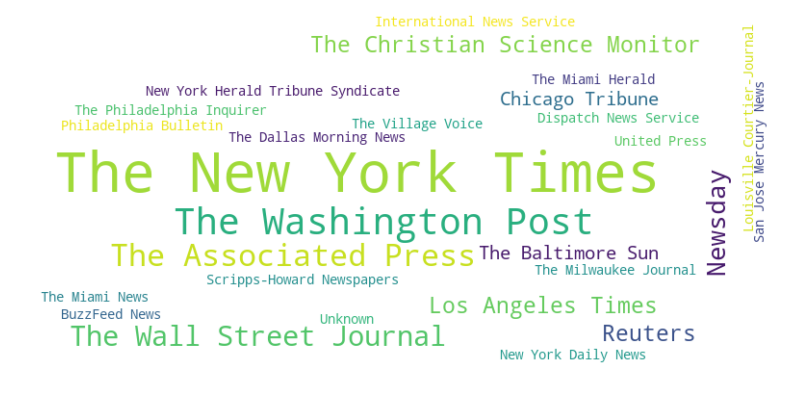

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_path = '/Users/yushuowang/Desktop/1Columbia/Data Journalism/Data Studio/Data-driven Pitches/Pulizer Prize New/news_org_counts.xlsx' 
df = pd.read_excel(file_path)

# Change the dataframe to a dictionary for the word cloud to work
# 假设 Excel 文件中第一列是媒体名称，第二列是出现次数
news_org_counts = dict(zip(df.iloc[:, 0], df.iloc[:, 1])) # Column 1: df.iloc[:, 0]

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(news_org_counts)

# Show Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

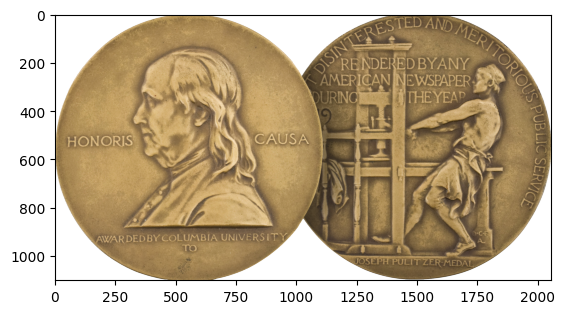

In [38]:
# Word cloud will be made with the shape of this image

background_image = np.array(Image.open('/Users/yushuowang/Desktop/1Columbia/Data Journalism/Data Studio/Data-driven Pitches/Pulizer Prize New/Pulitzer_Prizes_Medal.png'))
plt.imshow(background_image)

In [42]:
word_cloud2 = WordCloud(background_color = 'white',mask = background_image, 
               width = 800, height = 400).generate_from_frequencies(news_org_counts)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

# Save the image
word_cloud2.to_file('disney.png')

# Save the image to a svg file
with open('disney.svg', 'w') as f:
    f.write(word_cloud2.to_svg())